In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
gen = xr.open_dataset('data/samples/gen.nc')
real = xr.open_dataset('data/samples/real.nc')

STYLES = {
    "logBlues": {"cmap": "Blues", "norm": matplotlib.colors.LogNorm()}
}

def plot_map(da, ax, title = "", style = "Blues", add_colorbar=False, **kwargs):
    if style is not None:
        kwargs = {**STYLES[style], **kwargs}

    pcm = da.plot.pcolormesh(ax = ax, **kwargs)

    ax.set_title(title)

    return pcm

fig, axs = plt.subplots(ncols=5, nrows = 64, figsize = (24, 300))

for i in range(64):
    plot_map(real["__xarray_dataarray_variable__"][i] * 3600 * 24, axs[i][0], style="logBlues", add_colorbar=True)
    axs[i][0].set_title("Real Data")

    for j in range(4):
        plot_map(gen['__xarray_dataarray_variable__'][i][j] * 3600 * 24, axs[i][j+1], style = "logBlues", add_colorbar=True)
        axs[i][j+1].set_title("Generated " + str(j + 1) + " Data")

plt.show()

## QQ-plots

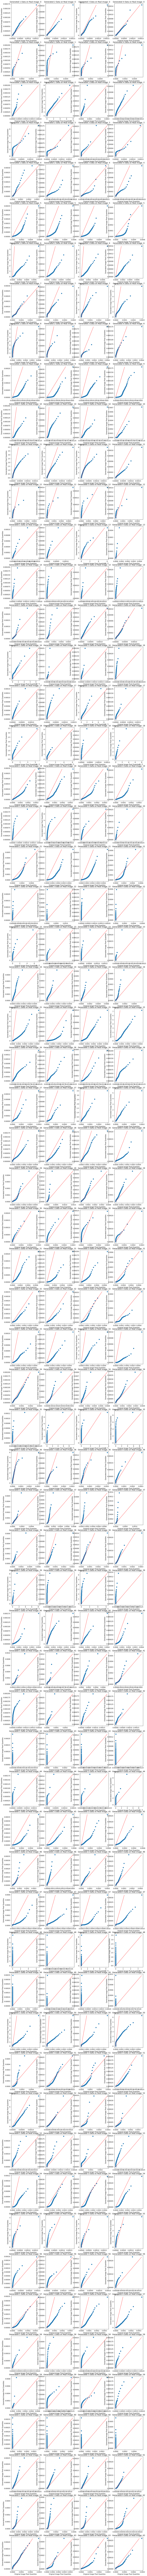

In [ ]:
gen = xr.open_dataset('data/samples/gen.nc')
real = xr.open_dataset('data/samples/real.nc')

# # Load some example image data
# original_images = np.random.normal(size=(100, 100))
# generated_images = np.random.normal(size=(100, 100))

# # Flatten the image data into 1D arrays of pixel intensities
# original_pixels = original_images.flatten()
# generated_pixels = generated_images.flatten()

# # Calculate the empirical distributions
# original_quantiles = np.percentile(original_pixels, np.linspace(0, 100, 101))
# generated_quantiles = np.percentile(generated_pixels, np.linspace(0, 100, 101))

# # Create the Q-Q plot
# plt.plot(original_quantiles, generated_quantiles, 'o')
# plt.plot([-3, 3], [-3, 3], 'r--')
# plt.xlabel('Original Image Pixel Quantiles')
# plt.ylabel('Generated Image Pixel Quantiles')
# plt.show()


fig, axs = plt.subplots(ncols=4, nrows = 64, figsize = (16, 320))

for i in range(64):
    original_images = real["__xarray_dataarray_variable__"][i].data    

    for j in range(4):
        generated_images = gen["__xarray_dataarray_variable__"][i][j].data
        # Flatten the image data into 1D arrays of pixel intensities
        original_pixels = original_images.flatten()
        generated_pixels = generated_images.flatten()

        # Calculate the empirical distributions
        original_quantiles = np.percentile(original_pixels, np.linspace(0, 100, 101))
        generated_quantiles = np.percentile(generated_pixels, np.linspace(0, 100, 101))

        generated_range = np.percentile(generated_pixels, [0, 100])
        generated_quantiles = generated_quantiles[(generated_quantiles >= generated_range[0]) & (generated_quantiles <= generated_range[1])]

        max_gen = generated_quantiles.max()

        axs[i][j].plot(original_quantiles, generated_quantiles, 'o')
        axs[i][j].plot([generated_range[0], generated_range[1]], [generated_range[0], generated_range[1]], 'r--')
        axs[i][j].set_xlabel('Original Image Pixel Quantiles')
        axs[i][j].set_ylabel('Generated Image Pixel Quantiles')
        axs[i][j].set_title("Generated " + str(j + 1) + " Data on Real image: " + str(i))

plt.show()

## Rank histograms

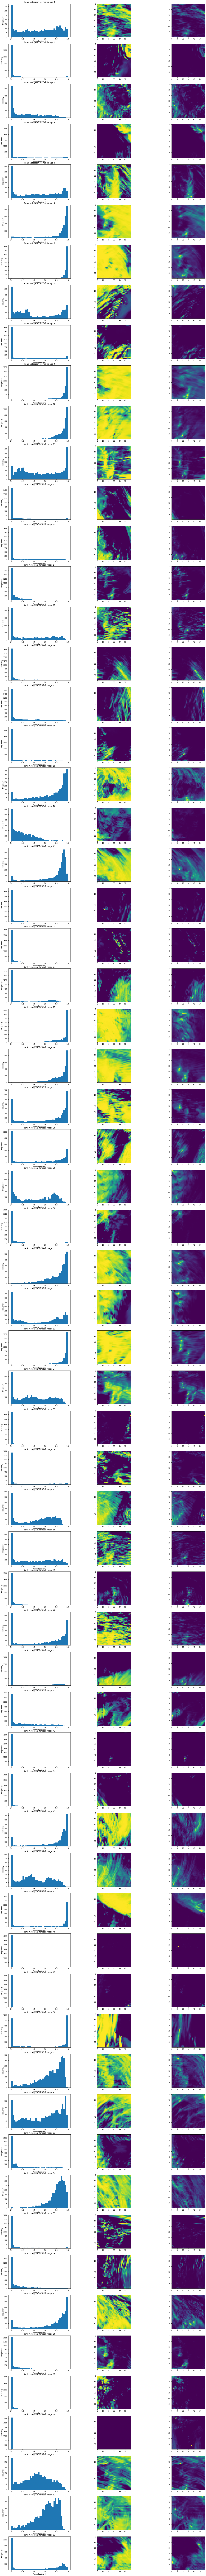

In [ ]:
fig, axs = plt.subplots(ncols=3, nrows = 64, figsize = (24, 300))

for i in range(64):
    ground_truth = real["__xarray_dataarray_variable__"][i].data
    predictions = gen["__xarray_dataarray_variable__"][i].data

    # Flatten ground truth and predictions into 1D arrays
    ground_truth_flat = ground_truth.flatten()
    predictions_flat = predictions.flatten()
    num_predictions = predictions_flat.shape[0]

    # Sort the ensemble of predictions in ascending order

    sorted_predictions = np.sort(predictions_flat, axis=0)

    # Determine the position of the actual value in the sorted ensemble of predictions
    position = np.searchsorted(sorted_predictions, ground_truth_flat)

    # Calculate the normalized rank of the actual value compared to all Np predictions
    num_below = position
    normalized_rank = num_below / num_predictions

    # Reshape normalized rank array back to the original image shape
    rank_image = normalized_rank.reshape(ground_truth.shape)

    # Plot histogram of normalized rank values
    axs[i][0].hist(normalized_rank, bins=40, range=(0, 1))
    axs[i][0].set_xlabel('Normalized rank')
    axs[i][0].set_ylabel('Frequency')
    axs[i][0].set_title('Rank histogram for real image ' + str(i))

    axs[i][1].imshow(rank_image)
    axs[i][2].imshow(ground_truth)
plt.show()

In [ ]:
from scipy.stats import wasserstein_distance
for i in range(64):
    real_image = real["__xarray_dataarray_variable__"][i].data
    for j in range(4):
        generated_image = gen["__xarray_dataarray_variable__"][i][j].data

        # Reshape the images to 1D arrays
        real_image_1d = real_image.reshape((-1,))
        generated_image_1d = generated_image.reshape((-1,))

        # Calculate the Wasserstein distance between the two distributions
        w_distance = wasserstein_distance(real_image_1d, generated_image_1d)

        print("Wasserstein Distance:", w_distance)


Wasserstein Distance: 4.829645228455473e-06
Wasserstein Distance: 4.323719054478429e-06
Wasserstein Distance: 3.6224720893372643e-06
Wasserstein Distance: 2.109582990355116e-06
Wasserstein Distance: 9.010037579768545e-06
Wasserstein Distance: 1.3661429344543696e-05
Wasserstein Distance: 1.1614000460718616e-05
Wasserstein Distance: 8.923895961250764e-06
Wasserstein Distance: 1.0272829873431456e-05
Wasserstein Distance: 5.316749671195026e-06
Wasserstein Distance: 2.1754602207911442e-05
Wasserstein Distance: 1.0253620213996898e-05
Wasserstein Distance: 1.0201180873273887e-05
Wasserstein Distance: 7.549756443410537e-06
Wasserstein Distance: 9.612879796019887e-06
Wasserstein Distance: 6.369352437257367e-06
Wasserstein Distance: 9.493449793295294e-06
Wasserstein Distance: 1.0646109722144071e-05
Wasserstein Distance: 6.89819803813673e-06
Wasserstein Distance: 7.703381657459275e-06
Wasserstein Distance: 7.172695591610898e-05
Wasserstein Distance: 8.261158558592885e-05
Wasserstein Distance: 8.4

In [ ]:
import properscoring as ps 

for i in range(64):
    y_true = real["__xarray_dataarray_variable__"][i].data
    for j in range(4):
        y_forecast = gen["__xarray_dataarray_variable__"][i][j].data 

        # Compute the CRPS
        crps = ps.crps_gaussian(y_true.ravel(), y_forecast.ravel(), sig = 1.0)

        print("CRPS:", crps.mean())


CRPS: 0.233695
CRPS: 0.233695
CRPS: 0.233695
CRPS: 0.233695
CRPS: 0.233695
CRPS: 0.233695
CRPS: 0.233695
CRPS: 0.233695
CRPS: 0.233695
CRPS: 0.233695
CRPS: 0.233695
CRPS: 0.233695
CRPS: 0.233695
CRPS: 0.233695
CRPS: 0.233695
CRPS: 0.233695
CRPS: 0.233695
CRPS: 0.233695
CRPS: 0.233695
CRPS: 0.233695
CRPS: 0.233695
CRPS: 0.233695
CRPS: 0.233695
CRPS: 0.233695
CRPS: 0.233695
CRPS: 0.233695
CRPS: 0.233695
CRPS: 0.233695
CRPS: 0.233695
CRPS: 0.233695
CRPS: 0.233695
CRPS: 0.233695
CRPS: 0.233695
CRPS: 0.233695
CRPS: 0.233695
CRPS: 0.233695
CRPS: 0.233695
CRPS: 0.233695
CRPS: 0.233695
CRPS: 0.233695
CRPS: 0.23369502
CRPS: 0.23369502
CRPS: 0.23369502
CRPS: 0.23369503
CRPS: 0.233695
CRPS: 0.233695
CRPS: 0.233695
CRPS: 0.233695
CRPS: 0.233695
CRPS: 0.233695
CRPS: 0.233695
CRPS: 0.233695
CRPS: 0.233695
CRPS: 0.233695
CRPS: 0.233695
CRPS: 0.233695
CRPS: 0.233695
CRPS: 0.233695
CRPS: 0.233695
CRPS: 0.233695
CRPS: 0.233695
CRPS: 0.233695
CRPS: 0.233695
CRPS: 0.233695
CRPS: 0.233695
CRPS: 0.233695
CR

In [ ]:
train = xr.open_dataset('data/train.nc')
train.

<bound method Mapping.keys of Frozen({'psl': <xarray.Variable (time: 15120, grid_latitude: 64, grid_longitude: 64)>
[61931520 values with dtype=float32]
Attributes:
    standard_name:    air_pressure_at_sea_level
    units:            Pa
    grid_mapping:     rotated_latitude_longitude
    um_stash_source:  m01s16i222
    cell_methods:     time: mean (interval: 1 hour), 'rotated_latitude_longitude': <xarray.Variable (time: 15120)>
array([-2.147484e+09, -2.147484e+09, -2.147484e+09, ..., -2.147484e+09,
       -2.147484e+09, -2.147484e+09])
Attributes:
    grid_mapping_name:            rotated_latitude_longitude
    longitude_of_prime_meridian:  0.0
    earth_radius:                 6371229.0
    grid_north_pole_latitude:     37.5
    grid_north_pole_longitude:    177.5
    north_pole_grid_longitude:    0.0, 'grid_latitude_bnds': <xarray.Variable (time: 15120, grid_latitude: 64, bnds: 2)>
[1935360 values with dtype=float32], 'grid_longitude_bnds': <xarray.Variable (time: 15120, grid_long

105494.41


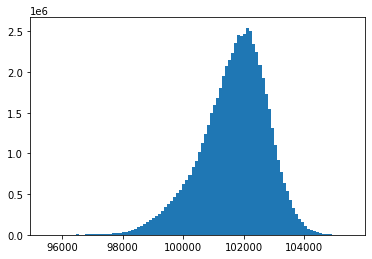

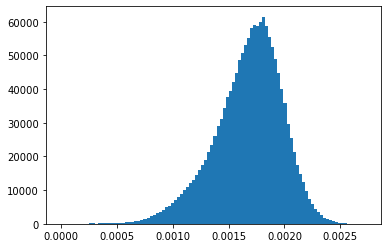

240.74753


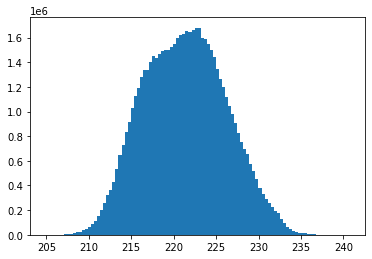

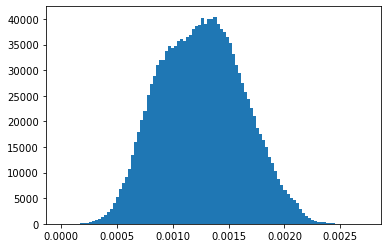

270.8578


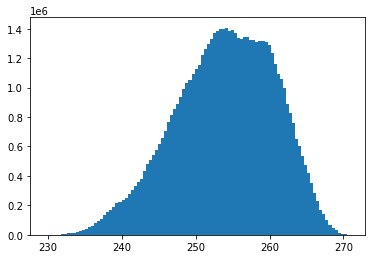

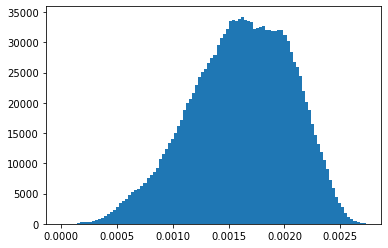

290.05887


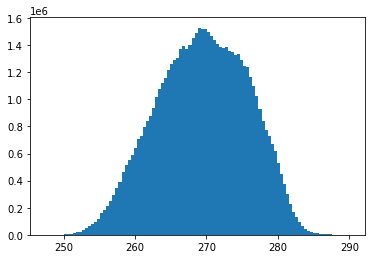

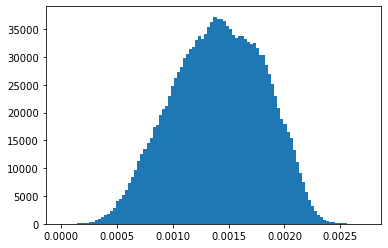

303.08307


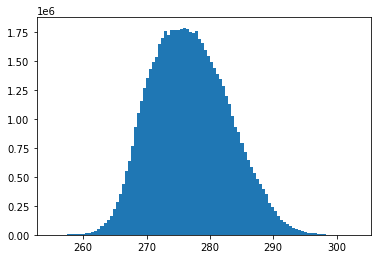

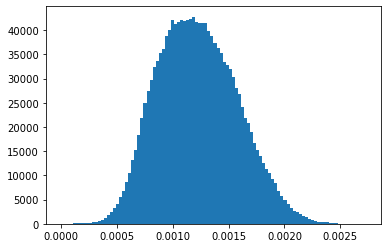

306.56277


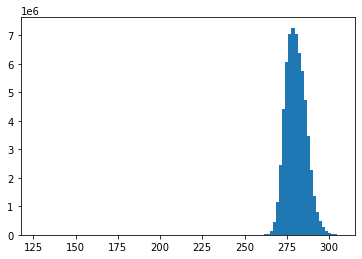

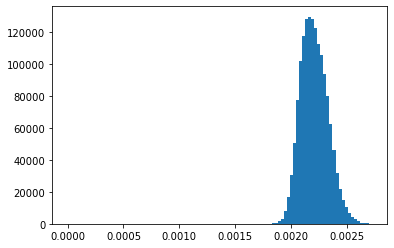

0.00038901843760981544


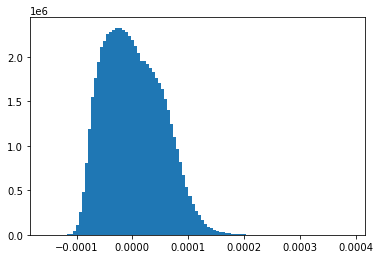

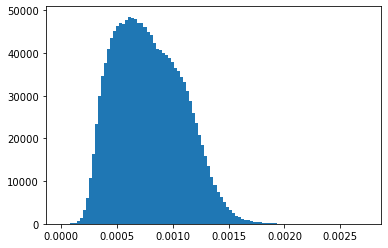

0.000388839844150018


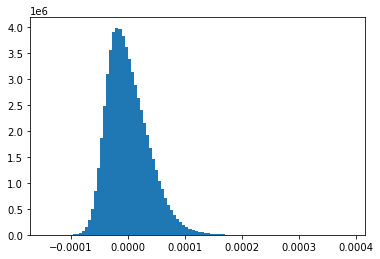

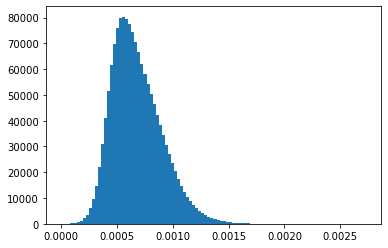

0.00024994293210257466


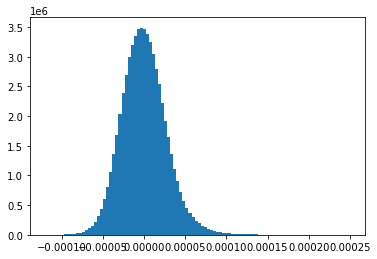

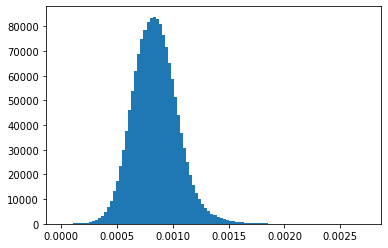

0.0003595005790718533


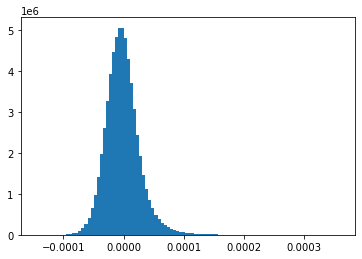

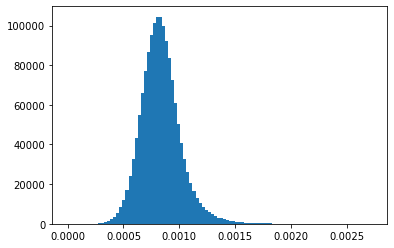

0.00042009653539722423


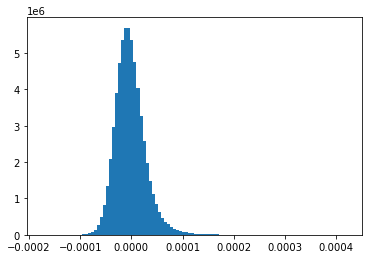

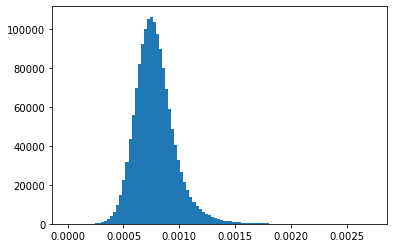

In [ ]:
columns = ['psl', 'temp250', 'temp500', 'temp700', 'temp850', 'temp925', 'vorticity250', 'vorticity500', 'vorticity700', 'vorticity850', 'vorticity925']

max = train['target_pr'].data.max()

for column in columns:
    print(train[column].data.max()) 
    y = np.array([train[column][i][2:62, 2:62].coarsen({"grid_latitude": 6, "grid_longitude": 6}).mean().data for i in range(len(train[column].data))])
    y = (max / (y.max() - y.min())) * (y - y.max()) + max # (y - y.min()) / (y.max() - y.min())
    plt.hist(train[column].data.flatten(), bins = 100)
    plt.show()
    plt.hist(y.flatten(), bins = 100)
    plt.show()

In [ ]:
train['target_pr'].data.max()

0.0027274378

: 